<a href="https://colab.research.google.com/github/aymanelkholy/Assignment-two/blob/main/DecisionTree_And_SVM_of_Classification_SocialNetAds2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing

In [ ]:

# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# Splitting
from sklearn.model_selection import train_test_split



# Scaling
from sklearn.preprocessing import StandardScaler



# Importing Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier



# Evaluation
from sklearn.metrics import confusion_matrix , accuracy_score

# Reading data

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Data Sets/Social_Network_Ads.csv')

In [ ]:
data.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [ ]:
data.shape

(400, 5)

In [ ]:
data.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


## Splitting X , y

In [ ]:
X = data.iloc[: , 2:4].values
y = data.iloc[:,4].values

In [ ]:
print(X[:10])

[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]]


In [ ]:
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

# Splitting X_train , X_test , y_train , y_test

In [ ]:
#Splitting
np.random.seed(42)
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size= 0.2 , random_state=42)

# Scalling
*

In [ ]:
# Scalaing
# standardScaler or minMaxScaler
sc = StandardScaler()

In [ ]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train[:10]

array([[-1.06675246, -0.38634438],
       [ 0.79753468, -1.22993871],
       [ 0.11069205,  1.853544  ],
       [ 0.60129393, -0.90995465],
       [ 1.87685881, -1.28811763],
       [-0.57615058,  1.44629156],
       [ 0.3069328 , -0.53179168],
       [ 0.99377543,  0.10817643],
       [-1.16487283,  0.45724994],
       [-1.55735433,  0.31180264]])

In [ ]:
X_train.max()

np.float64(2.3189753465047365)

In [ ]:
X_train.min()

np.float64(-1.949835834910827)

# Models

In [ ]:
# Decision Tree Model

classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train , y_train)


# Support Vector Machine Model

svm_classifier = SVC()
svm_classifier.fit(X_train , y_train)

SVC()

In [ ]:
y_pred = classifier.predict(X_test)
y_predsvm = svm_classifier.predict(X_test)

# Visualization

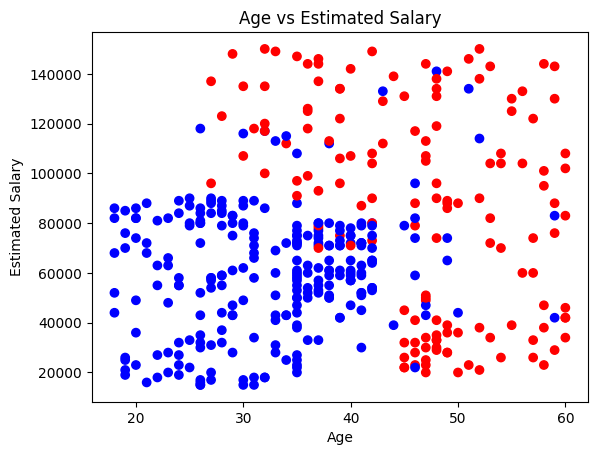

In [ ]:
plt.scatter(data['Age'], data['EstimatedSalary'], c=data['Purchased'], cmap='bwr')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Age vs Estimated Salary')
plt.show()


# Evaluation

In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix , accuracy_score

In [ ]:
cm = confusion_matrix(y_test , y_pred)


In [ ]:
cm

array([[46,  6],
       [ 7, 21]])

In [ ]:
cm_svm = confusion_matrix(y_test , y_predsvm)
cm_svm

array([[47,  5],
       [ 1, 27]])

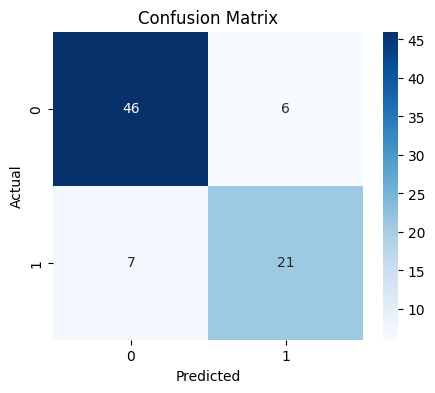

In [ ]:

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

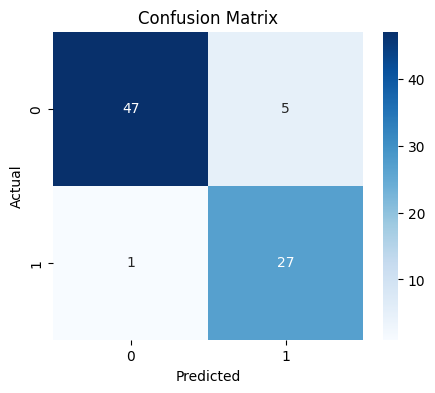

In [ ]:

plt.figure(figsize=(5,4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Accuracy Decision Tree

acc = (cm[0,0] +cm[1,1]) / (cm[1,1]+cm[1,0]+cm[0,1]+cm[0,0]) # same as cm[0,0] +cm[1,1] / len(X_test)
acc


np.float64(0.8375)

In [ ]:
# Accuracy SVM
acc = (cm_svm[0,0] +cm_svm[1,1]) / (cm_svm[1,1]+cm_svm[1,0]+cm_svm[0,1]+cm_svm[0,0]) # same as cm[0,0] +cm[1,1] / len(X_test)
acc


np.float64(0.925)

In [ ]:
# Decision Tree Acuuracy
accc = accuracy_score(y_test , y_pred)
print (f"accuracy according to Decision Tree Model is {accc*100}%")


# SVM Acuuracy
accc_svm = accuracy_score(y_test , y_predsvm)
print (f"accuracy according to SVM Model is {accc_svm*100}%")

accuracy according to Decision Tree Model is 83.75%
accuracy according to SVM Model is 92.5%
